In [1]:
# Core 
import datetime
import os
import glob
import tempfile
import shutil
import sys
import pickle
import warnings
import copy

# Analysis 
import xarray as xr
import numpy as np
import pandas as pd
import scipy as sp
import networkx 
from networkx.algorithms.components.connected import connected_components

# Plotting
import matplotlib.pyplot as plt

# Debugging 
import pdb, traceback
%load_ext line_profiler

# Radar Tools
import pyart
import tint
from tint import animate

# CPOL convenience functions
import CPOL_func as cf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/563/esh563/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/563/esh563/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [5]:
def test():
    filenames = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-02-10 10:00'), 
                  np.datetime64('2006-02-10 14:00'), 
                  np.timedelta64(10, 'm'))
    )[0]

    # Generate grid generator 
    # Note generators produce iterators
    # These are alternative to using lists and looping
    grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
             for fn in filenames)

    with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/circ_b_ind_set.pkl', 'rb') as f:
        b_ind_set = pickle.load(f)

    # Define settings for tracking
    settings = {
        'MIN_SIZE' : [1, 1, 500, 500],
        'FIELD_THRESH' : [40, 30, 20, 15],
        'ISO_THRESH' : [5, 5, 5, 5],
        'GS_ALT' : 1500,
        'SEARCH_MARGIN' : 10000,
        'FLOW_MARGIN' : 40000,
        'LEVELS' : np.array(
            [[500, 2500], 
             [2500, 5000],
             [5000, 7500],
             [7500, 10000]]
        ),
        'TRACK_INTERVAL' : 0,
        'BOUNDARY_GRID_CELLS' : b_ind_set,
        'UPDRAFT_START': 500
    }

    tracks_obj  = tint.Cell_tracks()

    for parameter in ['MIN_SIZE', 'FIELD_THRESH', 'GS_ALT', 'LEVELS', 
                      'TRACK_INTERVAL', 'ISO_THRESH', 'SEARCH_MARGIN',
                      'FLOW_MARGIN', 'BOUNDARY_GRID_CELLS'
                     ]:
        tracks_obj.params[parameter] = settings[parameter]

    # Calculate tracks
    tracks_obj.get_tracks(grids)

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    out_file_name = ('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/'
                     + 'tracks_obj_test.pkl'.format(dt))

    with open(out_file_name, 'wb') as f:
        pickle.dump(tracks_obj, f)
        
    return tracks_obj
        
if __name__ == '__main__':
    try:
        tracks_obj = test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Gathering files.


Traceback (most recent call last):
  File "<ipython-input-5-e4b433cd1ff5>", line 63, in <module>
    tracks_obj = test()
  File "<ipython-input-5-e4b433cd1ff5>", line 45, in test
    tracks_obj.get_tracks(grids)
  File "/home/563/esh563/TINT/tint/tracks.py", line 276, in get_tracks
    self.record, self.params, self.current_objects
  File "/home/563/esh563/TINT/tint/objects.py", line 287, in get_object_prop
    all_updrafts = identify_updrafts(raw3D, images, grid1, record, params)
  File "/home/563/esh563/TINT/tint/objects.py", line 190, in identify_updrafts
    raw3D_filt[z0], grid1.x['data'], grid1.y['data'], dx, dy
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/numba/dispatcher.py", line 369, in _compile_for_args
    raise e
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/numba/dispatcher.py", line 326, in _compile_for_args
    return self.compile(tuple(argtypes))
  File "/g/data3/hh5/public/a

> /g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/posixpath.py(376)abspath()
-> cwd = os.getcwd()
(Pdb) q


In [2]:
with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/tracks_obj_test.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

Gathering files.
Animating from 2006-02-10T10:00 to 2006-02-10T13:50.


Traceback (most recent call last):
  File "<ipython-input-4-7b6d09312ead>", line 41, in <module>
    test()
  File "<ipython-input-4-7b6d09312ead>", line 37, in test
    alt_high=9500)
  File "/home/563/esh563/TINT/tint/visualization.py", line 813, in animate
    **kwargs)
  File "/home/563/esh563/TINT/tint/visualization.py", line 235, in full_domain
    bbox_inches = 'tight', dpi=dpi)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/matplotlib/pyplot.py", line 696, in savefig
    fig.canvas.draw_idle()   # need this if 'transparent=True' to reset colors
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/matplotlib/backend_bases.py", line 2055, in draw_idle
    self.draw(*args, **kwargs)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py", line 437, in draw
    self.figure.draw(self.renderer)
  File "/g/data3/hh5/public/apps/

> /g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/shapely/predicates.py(11)__call__()
-> def __call__(self, this, other, *args):
(Pdb) q


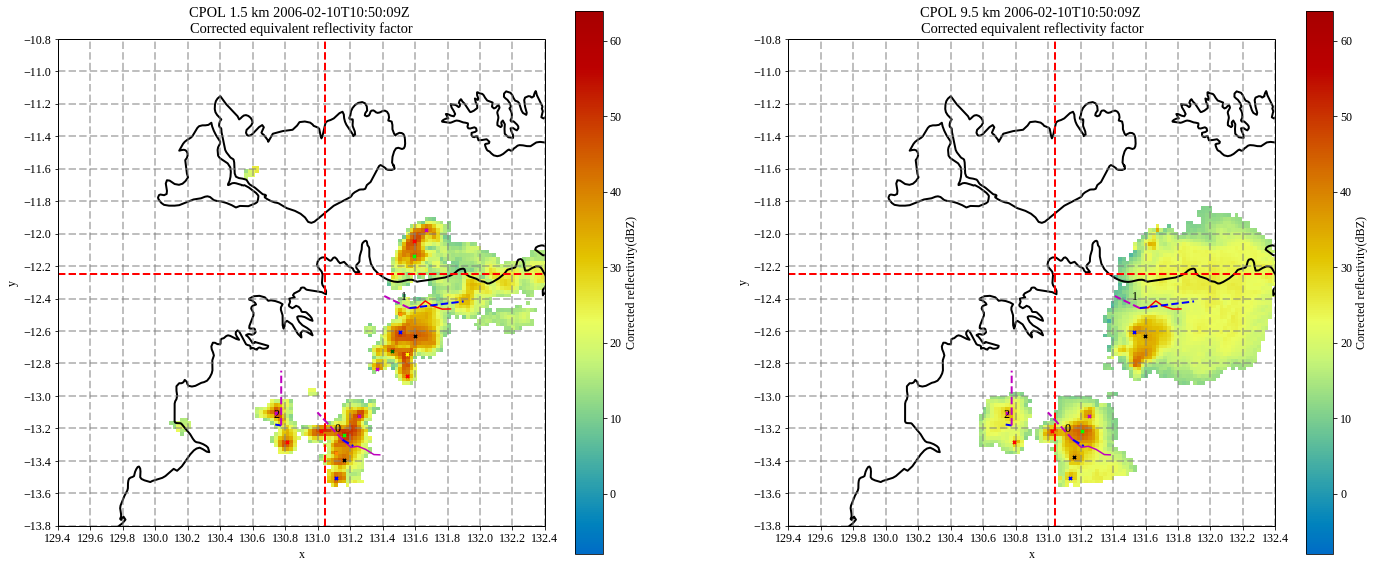

In [4]:
def test():
    lon_min = 131.0 - 1.6
    lon_max = 131.0 + 1.6

    lat_max = -12.2 + 1.6
    lat_min = -12.2 - 1.6

    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-02-10 10:00'), 
        np.datetime64('2006-02-10 14:00'), 
        np.timedelta64(10, 'm'))
    )

#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(tracks_obj, '385')

    # Generate grid generator 
    # Note generators produce iterators
    # These are alternative to using lists and looping
    grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
             for fn in filenames)

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_anim'

    animate(tracks_obj, grids, out_path,
            start_datetime = start_time,
            end_datetime = end_time,
            lat_lines=np.arange(lat_min, lat_max, .2),
            lon_lines=np.arange(lon_min, lon_max, .2),
            tracers=True, keep_frames=False, dpi=100, alt_low=1500,
            alt_high=9500)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Gathering files.
Animating 11 frames
Current grid at 2006-02-10T10:20:09.
Object initialises at 2006-02-10 10:00:09.
Moving to next object frame.
Current grid at 2006-02-10T10:20:09.
Object initialises at 2006-02-10 10:10:10.
Moving to next object frame.
Plotting frame at 2006-02-10T10:20:09
Plotting frame at 2006-02-10T10:30:09
Plotting updraft 7.  
Creating GIF - may take a few minutes.


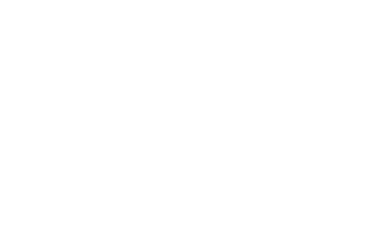

In [3]:
def test():
    uid = '1'

#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(tracks_obj, uid)
    
    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-02-10 10:20'), 
        np.datetime64('2006-02-10 10:40'), 
        np.timedelta64(10, 'm')))

    grids = (pyart.io.read_grid(fn) for fn in filenames)  # refresh grid generator

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_lagrangian'
    animate(tracks_obj, grids, out_path, style='updraft', uid=uid, 
            alt_low=500, alt_high=10000, keep_frames=False, dpi=100)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

In [5]:
test = [1,2]
test2 = np.like(test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-47f0dfc9c47f>", line 2, in <module>
    test2 = np.like(test)
AttributeError: module 'numpy' has no attribute 'like'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1095, in get_

AttributeError: module 'numpy' has no attribute 'like'

In [7]:
tracks_obj.params

{'FIELD_THRESH': [40, 30, 20, 15],
 'MIN_SIZE': [1, 1, 500, 500],
 'SEARCH_MARGIN': 10000,
 'FLOW_MARGIN': 40000,
 'MAX_FLOW_MAG': 50,
 'MAX_DISPARITY': 999,
 'MAX_SHIFT_DISP': 15,
 'ISO_THRESH': [5, 5, 5, 5],
 'ISO_SMOOTH': 3,
 'GS_ALT': 1500,
 'LEVELS': array([[  500,  2500],
        [ 2500,  5000],
        [ 5000,  7500],
        [ 7500, 10000]]),
 'TRACK_INTERVAL': 0,
 'BOUNDARY_GRID_CELLS': {(0, 48),
  (0, 49),
  (0, 50),
  (0, 51),
  (0, 52),
  (0, 53),
  (0, 54),
  (0, 55),
  (0, 56),
  (0, 57),
  (0, 58),
  (0, 59),
  (0, 60),
  (0, 61),
  (0, 62),
  (0, 63),
  (0, 64),
  (0, 65),
  (0, 66),
  (0, 67),
  (0, 68),
  (1, 43),
  (1, 44),
  (1, 45),
  (1, 46),
  (1, 47),
  (1, 69),
  (1, 70),
  (1, 71),
  (1, 72),
  (1, 73),
  (2, 40),
  (2, 41),
  (2, 42),
  (2, 74),
  (2, 75),
  (2, 76),
  (3, 37),
  (3, 38),
  (3, 39),
  (3, 77),
  (3, 78),
  (3, 79),
  (4, 35),
  (4, 36),
  (4, 80),
  (4, 81),
  (5, 33),
  (5, 34),
  (5, 82),
  (5, 83),
  (6, 31),
  (6, 32),
  (6, 84),
  (6, 85

In [6]:
# Let's filter by tilt direction and magnitude, velocity magnitude
# and significant area.
forward_tilt = ((-45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 45))
backward_tilt = ((-135 >= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                | (tracks_obj.system_tracks['sys_rel_tilt_dir'] >= 135))
left_tilt = ((45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 135))
right_tilt = ((-135 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= -45))
sig_tilt_mag = (tracks_obj.system_tracks['tilt_mag'] >= 2000)
vel_mag = np.sqrt(tracks_obj.system_tracks['u']**2 
                  + tracks_obj.system_tracks['v']**2)
sig_vel_mag = ((vel_mag >= 5) & (vel_mag <= 40))
eccentricity_mag = tracks_obj.system_tracks['eccentricity'] > .95
# Note for CPOL 2.5 km, total scan area is only 66052 km^2. This makes 
# traditional MCS definitions of area > 30000 km^2 difficult to apply, 
# and still coherently calculate tilt. 
sig_area = ((tracks_obj.system_tracks['proj_area'] >= 5000) & 
            (tracks_obj.system_tracks['proj_area'] <= 50000))
not_border = (tracks_obj.system_tracks['touch_border']*6.25 / tracks_obj.system_tracks['proj_area']) < 0.01

tracks_0 = tracks_obj.tracks[['touch_border', 'proj_area']].xs(
    0, level='level'
)
not_border_0 = (tracks_0['touch_border'] * 6.25 / tracks_0['proj_area']) < 0.01

In [14]:
# Let's find the cells that were tracked for the most frames.
sub_cond = sig_tilt_mag & sig_vel_mag & sig_area & not_border & not_border_0
tracks_obj.system_tracks[sub_cond].groupby(level='uid').size().sort_values(ascending=False)[:20]

uid
376    16
87     12
112    12
105    10
76     10
385    10
368     9
215     6
354     5
198     5
218     4
338     4
91      4
170     4
169     4
293     3
20      3
140     3
117     3
226     3
dtype: int64

In [16]:
tracks_obj.system_tracks[sub_cond].xs('87', level='uid')[['eccentricity', 'touch_border', 'proj_area', 'sys_rel_tilt_dir']]

,,eccentricity,touch_border,proj_area,sys_rel_tilt_dir
scan,time,,,,
1360,2006-02-10 11:50:13,0.981,20,14756.25,-63.169
1362,2006-02-10 12:10:10,0.974,21,15512.50,-83.056
1363,2006-02-10 12:20:08,0.968,19,15125.00,-113.247
1364,2006-02-10 12:30:08,0.888,14,14087.50,-155.370
1365,2006-02-10 12:40:08,0.886,8,14193.75,-178.693
1366,2006-02-10 12:50:13,0.901,5,14218.75,176.335
1367,2006-02-10 13:00:09,0.958,6,12575.00,-177.384
1368,2006-02-10 13:10:10,0.965,5,11850.00,-178.040
1370,2006-02-10 13:30:08,0.756,6,11531.25,-169.483


# Calculate Some Statistics

In [19]:
subset_logic = sig_area & not_border & sig_vel_mag & sig_tilt_mag & not_border_0

sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]

max_MCS = max(MCS_lengths)

# Create 3 lists with lengths the lifetime of longest object.
[TS, LS, PS] = [np.zeros(60) for i in range(3)]

for i in sub_uids:
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    tilts = obj['sys_rel_tilt_dir']

    forward_tilt = ((-45 <= tilts) & (tilts <= 45))
    backward_tilt = ((-135 >= tilts) | (tilts >= 135))

    fwd_inds = scan_label[np.argwhere(forward_tilt).flatten().tolist()].tolist()
    bwd_inds = scan_label[np.argwhere(backward_tilt).flatten().tolist()].tolist()
    pll_inds = scan_label[np.argwhere(~backward_tilt & ~forward_tilt).flatten().tolist()].tolist()

    TS[bwd_inds] += 1
    LS[fwd_inds] += 1
    PS[pll_inds] += 1

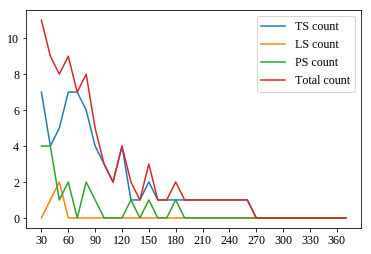

In [21]:
plt.plot(np.arange(30,380,10), TS[3:38], label='TS count')
plt.plot(np.arange(30,380,10), LS[3:38], label='LS count')
plt.plot(np.arange(30,380,10), PS[3:38], label='PS count')
plt.plot(np.arange(30,380,10), (TS+PS+LS)[3:38], label='Total count')
plt.xticks(np.arange(30,380,30))
plt.legend()

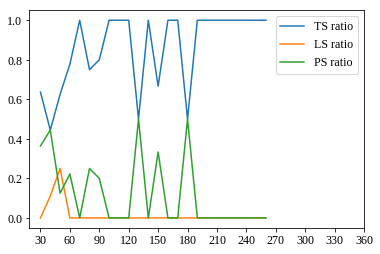

In [22]:
tot = (TS+PS+LS)

plt.plot(np.arange(30,380,10), (TS/tot)[3:38], label='TS ratio')
plt.plot(np.arange(30,380,10), (LS/tot)[3:38], label='LS ratio')
plt.plot(np.arange(30,380,10), (PS/tot)[3:38], label='PS ratio')
# plt.plot(np.arange(30,380,10), (TS+PS+LS)[3:38], label='Total')
plt.xticks(np.arange(30,380,30))
plt.legend()
# Note that we don't really know the start times of the systems!